# Predicting Iowa House Sales Price (Capstone - I)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')

### EDA

In [2]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.shape

(1460, 81)

#### Replacing spaces from column names in df

In [3]:
df.columns = df.columns.str.replace(" ","_")

In [4]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
pd.set_option('display.max_columns', None)
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Removing columns with lots of missing enteries

In [6]:
df.drop(['FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

Check if there are any columns left with many missing values

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

#### Removing any duplicate rows

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(1460, 77)

No duplicarte rows found

#### Seperating categorical and numerical columns

In [9]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
cat_cols  = list(df.dtypes[df.dtypes == 'object'].index)
num_cols = list(df.dtypes[df.dtypes != 'object'].index)
num_cols.remove('Id')
cat_cols.append('SalePrice')


In [10]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


#### Treating missing values

Numnerical Columns

In [11]:
df[num_cols].isnull().sum()[df[num_cols].isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Only three numerical columns have missing values. We will impute the missing values

GarageYrBlt: This should be most likely the either the year of construction or the year of remodel

We can check the overlap between YearBuilt and GarageYrBlt

In [12]:
print("YearBuilt = GarageYrBlt: " + str(sum(df['YearBuilt'] == df['GarageYrBlt'])))
print("YearRemodel = GarageYrBlt: " + str(sum(df['YearRemodAdd'] == df['GarageYrBlt'])))
print("YearBuilt = YearRemodel = GarageYrBlt: " + str(sum((df['YearBuilt'] == df['GarageYrBlt']) & (df['YearRemodAdd'] == df['YearBuilt']))))

YearBuilt = GarageYrBlt: 1089
YearRemodel = GarageYrBlt: 725
YearBuilt = YearRemodel = GarageYrBlt: 671


So, from the above analysis we can conclude that most of the garages were built in the same year as the year of construction

In [13]:
df[df['GarageYrBlt'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


Looking at the data of the rows with missing GarageYrBlt, we can also conclude that there are apprently no garages for these houese. But what if PavedDrive variable is Y, does that mean that there is a garage in the house (as there is paved drive way) and the garage data is missing?

Data description tells us that NA means no garage. So we will replace missing GarageYrBlt with the construction year

In [14]:
df['GarageYrBlt'][df['GarageYrBlt'].isnull()] = df['YearBuilt'][df['GarageYrBlt'].isnull()]

LotFrontage

Lot frontage seems to be varying a lot with type of property (BldgType). we can impute missing LotFrontage with the means of BldgType

In [15]:
df.groupby('BldgType')['LotFrontage'].mean()

BldgType
1Fam      74.503018
2fmCon    66.428571
Duplex    71.595745
Twnhs     24.675000
TwnhsE    41.978261
Name: LotFrontage, dtype: float64

Replacing LotFrontage with the means of LotFrontage depending on BldgType

In [16]:
for i in df['BldgType'].unique():
    df['LotFrontage'][np.logical_and(df['LotFrontage'].isnull(),df['BldgType'] == i) ] = float(df.groupby('BldgType')['LotFrontage'].mean().values[df.groupby('BldgType')['LotFrontage'].mean().index == i])

In [17]:
#checking if ther
df[df['LotFrontage'].isnull()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


MasVnrArea NaN means there is no masonry done and should be None

In [18]:
#checking all the rows where MasVnrArea is NaN
df[df['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,74.503018,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,74.503018,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [19]:
#replacing NaN with None
df['MasVnrArea'][df['MasVnrArea'].isnull()] = 0

In [20]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageYrBlt         0
GarageFinish       81
GarageCars          0
GarageArea

All missing values have been imputed in numerical columns. Ideally I should have removed the outliers first and then imputed, as outliers will impact the mean

### Univariate Analysis
#### Checking for outliers in numericals columns

In [21]:
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.220886,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.455535,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,72.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Following might have outliers:
LotArea
BsmtFinSF1
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
LowQualFinSF
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal

In [22]:
df[df['LotArea'] == 215245]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000


Creating a function for plotting box plots for the numerical variables

In [23]:
def box(x, index, data=df):
    plt.figure(figsize=(100,20)) 
    plt.subplot(5,5,index)
    sns.boxplot(data[x])   
    plt.title(x)
    plt.plot()

In [24]:
y = """LotArea
BsmtFinSF1
BsmtFinSF2
LowQualFinSF
BsmtHalfBath
LowQualFinSF
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal"""    

vr_list = y.split("\n")

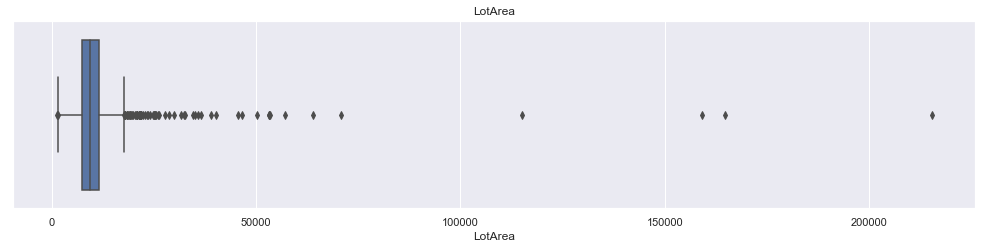

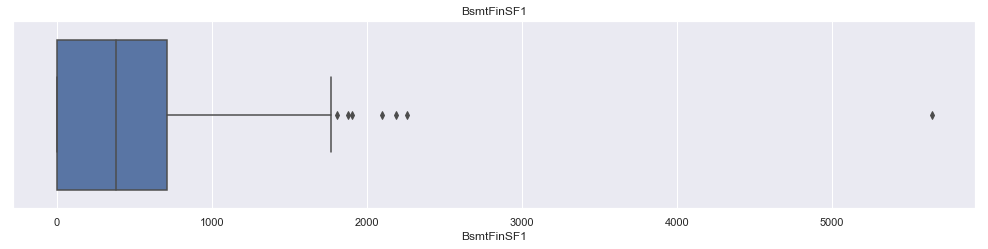

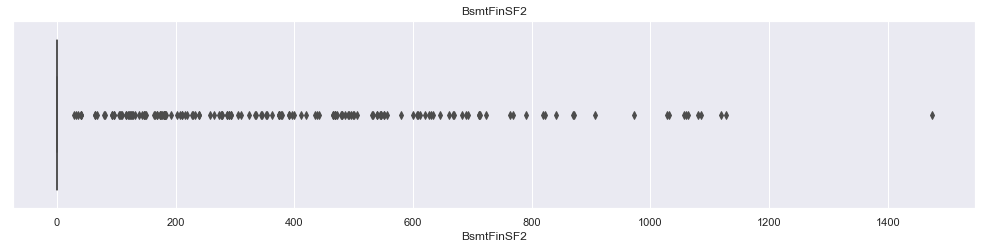

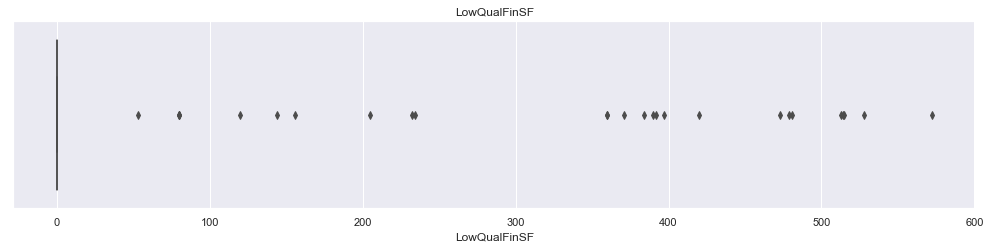

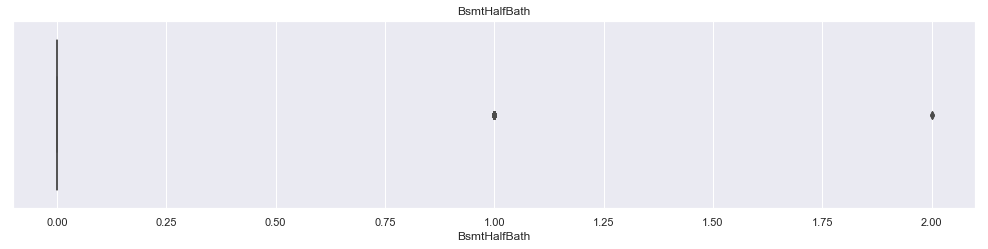

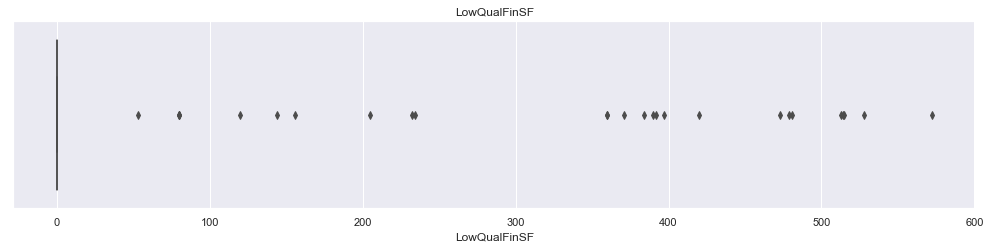

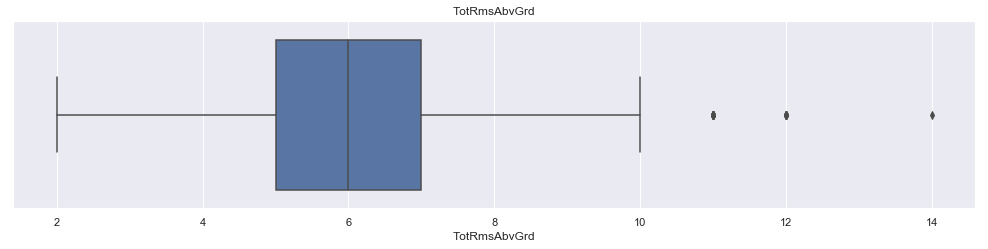

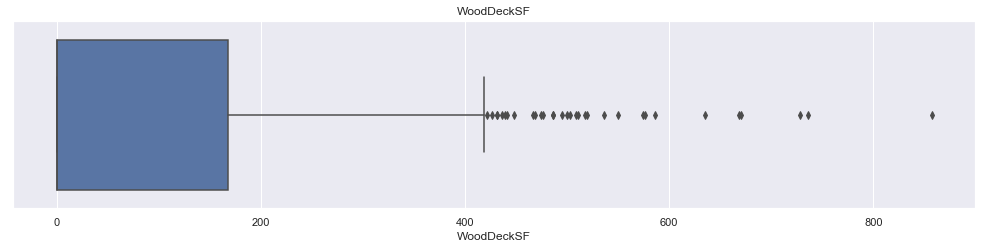

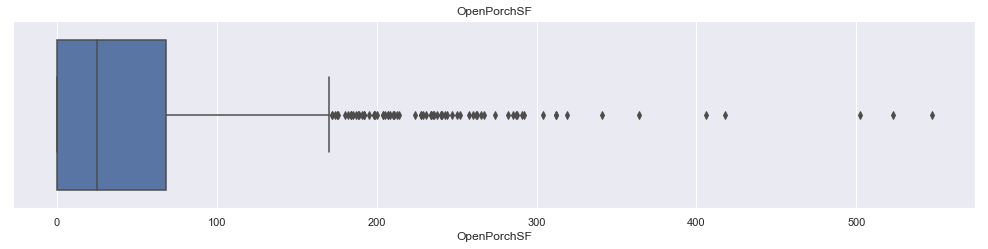

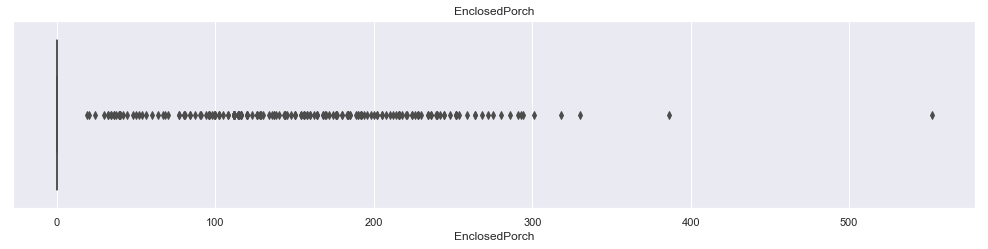

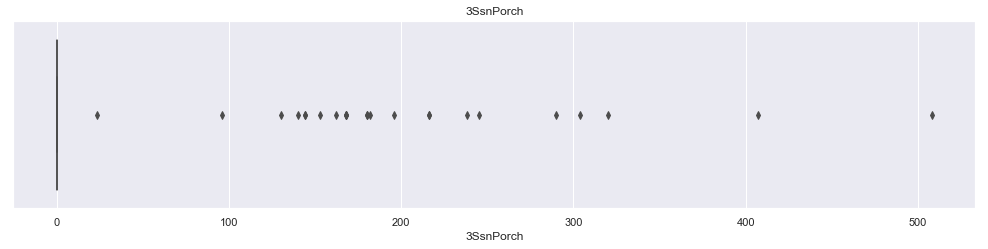

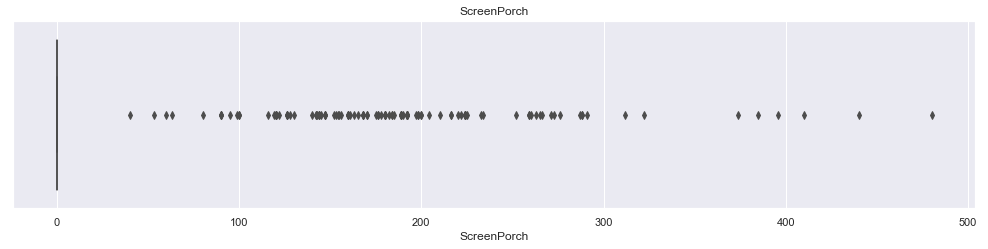

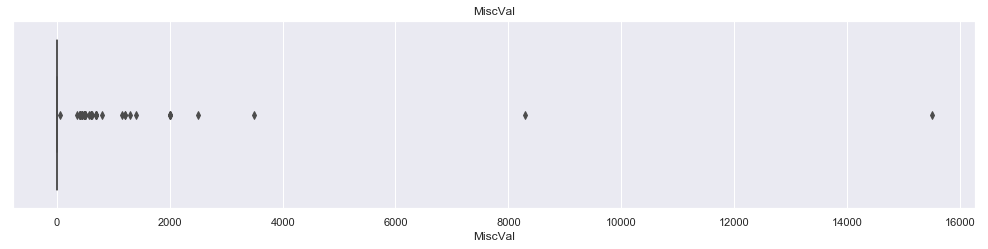

In [25]:
for index,x in enumerate(vr_list):
    box(x, index+1)

LotArea has outliers above 100000

BsmtFinSF1 has outliers above 5000

WoodDeckSF has outliers above 800

EnclosedPorch above 500

MiscVal above 8000

Removing outliers from df

In [26]:
df2 = df[(df['LotArea'] < 100000)]
df2 = df2[(df['BsmtFinSF1'] < 5000)]
df2 = df2[(df['WoodDeckSF'] < 800)]
df2 = df2[(df['EnclosedPorch'] < 500)]
df2 = df2[(df['MiscVal'] < 8000)]

In [27]:
df.shape, df2.shape

((1460, 77), (1451, 77))

In [28]:
df = df2

#### Checking multicolinearity

#melted_corr = pd.melt(frame = corr.reset_index(), id_vars = 'index')
#melted_corr.columns = ['x','y','value']

#melted_corr

def heatplot(x,y,values):
    
    fig,ax = plt.subplot()
    plt.figure(figsize = (20,20))
    
    x_unique = list(sorted(set(x)))
    y_unique = list(sorted(set(y)))
    
    x_map = {q[1]:q[0] for q in enumerate(x_unique)}
    y_map = {q[1]:q[0] for q in enumerate(y_unique)}
    
    
    plt.scatter(x = x.map(x_map), y=y.map(y_map), s = values*500, marker = 's')
    kwags = {'fontsize':'large'}
    plt.xticks(labels=x_unique, ticks = [x_map[i] for i in x_unique], rotation = 45, horizontalalignment='right', **kwags )
    plt.yticks(labels=y_unique, ticks = [y_map[i] for i in x_unique],**kwags)
    
    

    plt.plot()

heatplot(melted_corr['x'],melted_corr['y'],melted_corr['value'].abs())

plt.set_xticks([t + 0.5 for t in plt.get_xticks()], minor=True)

#### Before we check multi collineraity, let's check the univariate and bivariate distributions 

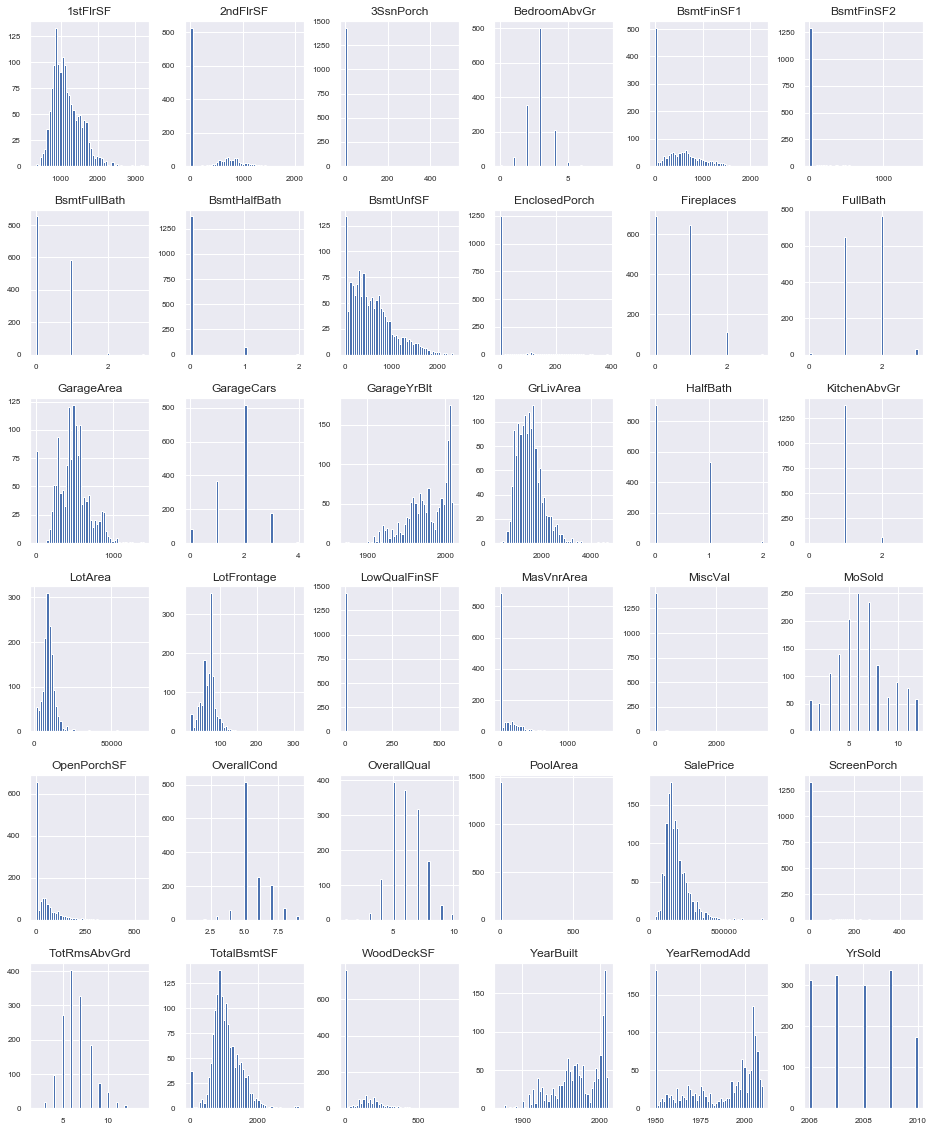

In [29]:
df[num_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

A few observations:

1. 1stFlrSF, GrLivArea, TotalBsmtSF, SalesPrice have similar distributions
2. LotArea and LotFrontage have similar distribution
3. Some variables have high number of 0s (0 probably implies that, that feature does't exist for the house). This might have an implication on correlations
4. YearBuilt, YearRemodeAdd (lots of 0s though!), GarageYrBlt have similar distribution
5. Many variables don't have a good spread and may not be able to tell much about the SalesPrice. We might want to remove these variables. These variables are:

    2dFlrSF
    3SsnPorch
    BsmtFinSF2
    BsmtHalfBath
    EnclosedPorch
    KitchAboveGr
    LowQualFinSF
    MiscVal
    PoolArea
    ScreenPorch
    WoodDeckSF (lots of 0s)
    
6. Variables that seem helpful are:
    1stFlrSF
    BedroomAboveGr
    BsmtFinSF1 (lots of 0s)
    BsmtFullBath
    BsmtUnfSF
    Fireplaces
    FullBath
    GarageArea (lots of 0s)
    GarageCars (should be highly correlated to GarageArea)
    GarageYrBlt
    GrLivArea
    HalfBath
    LotArea
    LotFrontage(should be highly correlated with LotArea)
    MoSold
    OpenPorchSF (lots of 0s)
    OverallCond
    OverallQual
    TotRmsAbvGrd
    TotalBsmtSF (lots of 0s)
    YearBlt
    YearRemodAdd (lots of 0s)
    YrSold

#### Checking Correlations

In [30]:
df_corr = df[num_cols].corr()

In [31]:
df_corr.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.448733,0.207095,-0.030456,0.101181,0.061600,0.156560,0.137668,0.035612,0.134448,0.299151,0.377602,0.064725,0.013869,0.332352,0.062798,-0.008930,0.176511,0.049576,0.271796,-0.003979,0.330145,0.223429,0.073288,0.270219,0.302388,0.085827,0.121810,-0.010798,0.071278,0.048197,0.060686,0.010118,0.035693,0.009995,0.349226
LotArea,0.448733,1.000000,0.157761,-0.013179,0.038101,0.030942,0.141477,0.199329,0.080007,0.051324,0.292105,0.379131,0.108129,0.004431,0.369488,0.120285,0.024437,0.181345,0.070358,0.218559,-0.018590,0.311341,0.311158,0.038890,0.254061,0.276442,0.201008,0.150735,-0.021551,0.049157,0.106203,0.049254,0.005373,0.003663,-0.023191,0.362549
OverallQual,0.207095,0.157761,1.000000,-0.089100,0.575472,0.551675,0.405720,0.224648,-0.060987,0.313762,0.542430,0.473328,0.296587,-0.038619,0.594546,0.101076,-0.043657,0.558269,0.275110,0.107729,-0.182790,0.429804,0.394647,0.559186,0.601726,0.557562,0.237835,0.304691,-0.123862,0.031017,0.066367,0.034193,-0.052640,0.074703,-0.024987,0.795015
OverallCond,-0.030456,-0.013179,-0.089100,1.000000,-0.378109,0.073022,-0.127218,-0.042097,0.043865,-0.139164,-0.174383,-0.143769,0.032441,0.034166,-0.074342,-0.050275,0.119891,-0.194193,-0.058570,0.013783,-0.086272,-0.054281,-0.021329,-0.298918,-0.184155,-0.147546,-0.000280,-0.031682,0.082493,0.025579,0.054979,0.016461,0.071345,-0.003451,0.043727,-0.076313
YearBuilt,0.101181,0.038101,0.575472,-0.378109,1.000000,0.594615,0.311207,0.255565,-0.047798,0.148579,0.404478,0.285306,0.011812,-0.178355,0.202007,0.189299,-0.032454,0.472316,0.241198,-0.068933,-0.177046,0.094722,0.148195,0.844643,0.539262,0.481911,0.227582,0.186223,-0.388463,0.031309,-0.050702,0.011644,-0.074750,0.011967,-0.015265,0.528170


Checking correlations with SalePrice column, and only taking values which are >0.5 (or < -0.5), and arrangin them in descending fashion

In [32]:
df_corr['SalePrice'][abs(df_corr['SalePrice']) >0.5].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.795015
GrLivArea       0.728049
TotalBsmtSF     0.642138
GarageCars      0.640702
GarageArea      0.628284
1stFlrSF        0.621986
FullBath        0.568006
TotRmsAbvGrd    0.542413
YearBuilt       0.528170
GarageYrBlt     0.515012
YearRemodAdd    0.511506
Name: SalePrice, dtype: float64

In [33]:
features = df_corr['SalePrice'][abs(df_corr['SalePrice']) >0.5].index
features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

#### The above features seem to be the most important features describing the SalePrice linerarly

#### Let's look at bivariate distributions to better understand the relationship of target variables with the other variables

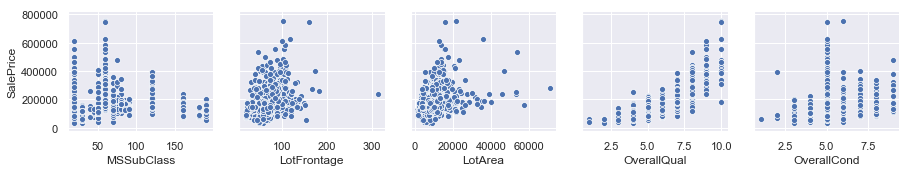

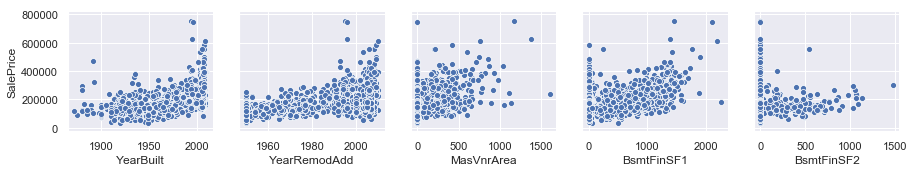

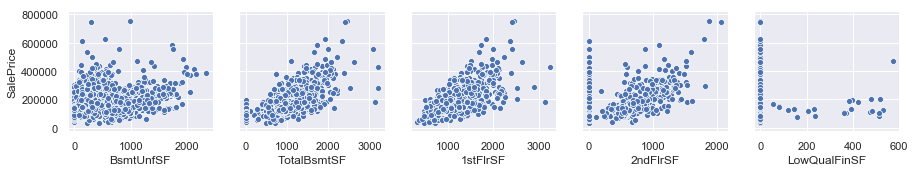

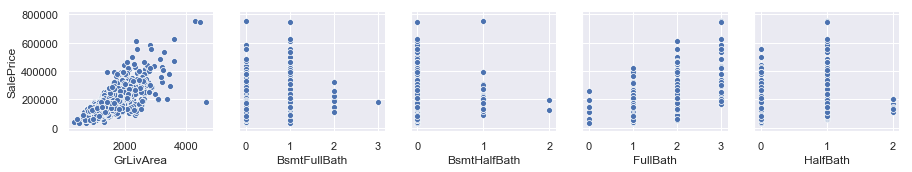

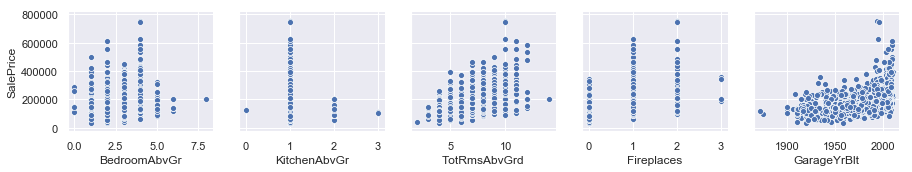

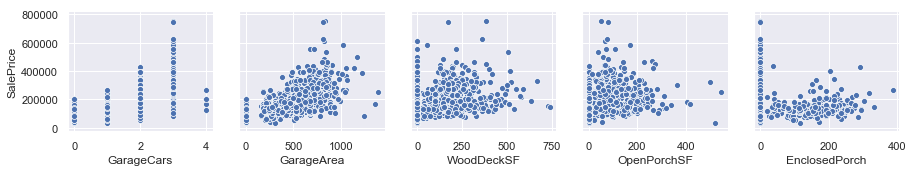

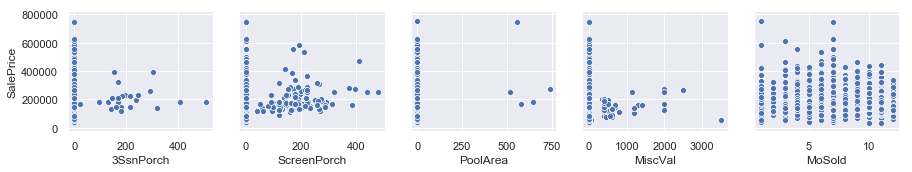

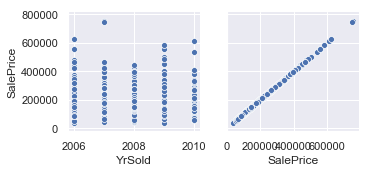

In [34]:
for i in range(0, len(num_cols),5):
    sns.pairplot(data = df, x_vars = num_cols[i:i+5], y_vars = ['SalePrice'])
    #print(i+5)

In [35]:
len(df[num_cols].columns)

37

In [36]:
# sns.pairplot(data = df, vars = num_cols)

# running the above pairplot throws tooooo many charts and it's overwhelming to interpret so may charts together

#### Now let's plot correlation matrix to see if we can remove multicollinearity

In [37]:
corr = df[num_cols].drop('SalePrice', axis=1).corr()
corr.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
LotFrontage,1.000000,0.448733,0.207095,-0.030456,0.101181,0.061600,0.156560,0.137668,0.035612,0.134448,0.299151,0.377602,0.064725,0.013869,0.332352,0.062798,-0.008930,0.176511,0.049576,0.271796,-0.003979,0.330145,0.223429,0.073288,0.270219,0.302388,0.085827,0.121810,-0.010798,0.071278,0.048197,0.060686,0.010118,0.035693,0.009995
LotArea,0.448733,1.000000,0.157761,-0.013179,0.038101,0.030942,0.141477,0.199329,0.080007,0.051324,0.292105,0.379131,0.108129,0.004431,0.369488,0.120285,0.024437,0.181345,0.070358,0.218559,-0.018590,0.311341,0.311158,0.038890,0.254061,0.276442,0.201008,0.150735,-0.021551,0.049157,0.106203,0.049254,0.005373,0.003663,-0.023191
OverallQual,0.207095,0.157761,1.000000,-0.089100,0.575472,0.551675,0.405720,0.224648,-0.060987,0.313762,0.542430,0.473328,0.296587,-0.038619,0.594546,0.101076,-0.043657,0.558269,0.275110,0.107729,-0.182790,0.429804,0.394647,0.559186,0.601726,0.557562,0.237835,0.304691,-0.123862,0.031017,0.066367,0.034193,-0.052640,0.074703,-0.024987
OverallCond,-0.030456,-0.013179,-0.089100,1.000000,-0.378109,0.073022,-0.127218,-0.042097,0.043865,-0.139164,-0.174383,-0.143769,0.032441,0.034166,-0.074342,-0.050275,0.119891,-0.194193,-0.058570,0.013783,-0.086272,-0.054281,-0.021329,-0.298918,-0.184155,-0.147546,-0.000280,-0.031682,0.082493,0.025579,0.054979,0.016461,0.071345,-0.003451,0.043727
YearBuilt,0.101181,0.038101,0.575472,-0.378109,1.000000,0.594615,0.311207,0.255565,-0.047798,0.148579,0.404478,0.285306,0.011812,-0.178355,0.202007,0.189299,-0.032454,0.472316,0.241198,-0.068933,-0.177046,0.094722,0.148195,0.844643,0.539262,0.481911,0.227582,0.186223,-0.388463,0.031309,-0.050702,0.011644,-0.074750,0.011967,-0.015265


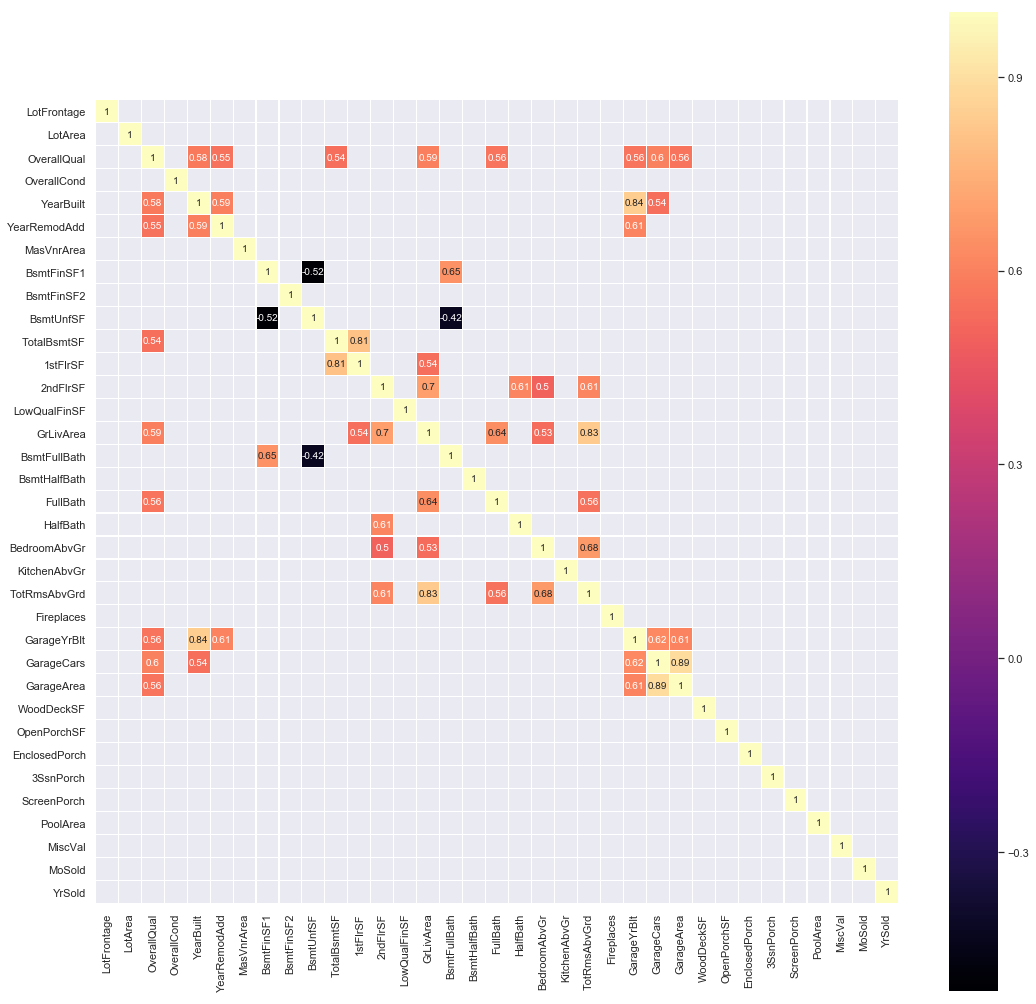

In [38]:
plt.figure(figsize=(18, 18))
sns.heatmap(data = corr[(corr >= 0.5) | (corr <= -0.4)],cmap='magma', linewidths=0.1,annot = True, square=True,annot_kws = {"size":10})

Overall Qual seems to be highly correlated with many variables
    YeatBuilt, YearRemodAdd, TotalBsmtSF, GrKivArea, GarageYrBlt, FullBath, GarageCars, GarageCars
1. BsmtFinSF1: BsmtFullBath, BsmtUnfSF
2. YearBuilt: GarageYrBlt, YearRemodAdd
3. 1stFlrSF: TotalBsmtSF
4. GrLivArea: TotRmsAbvGrd, 2ndFlrSF, FullBath, BedroomAbvGr, 1stFlrSF
5. 2nfFleSF: HalfBath
6. BedroomAbvGr: TotRmsAbvGrd
7. GarageArea: GarageCars

#### We may want to replace many variables with the varibles that are highly correlated with the SalePrice variable

### Plotting linear regression lines on the variables highly correlated with the target variable

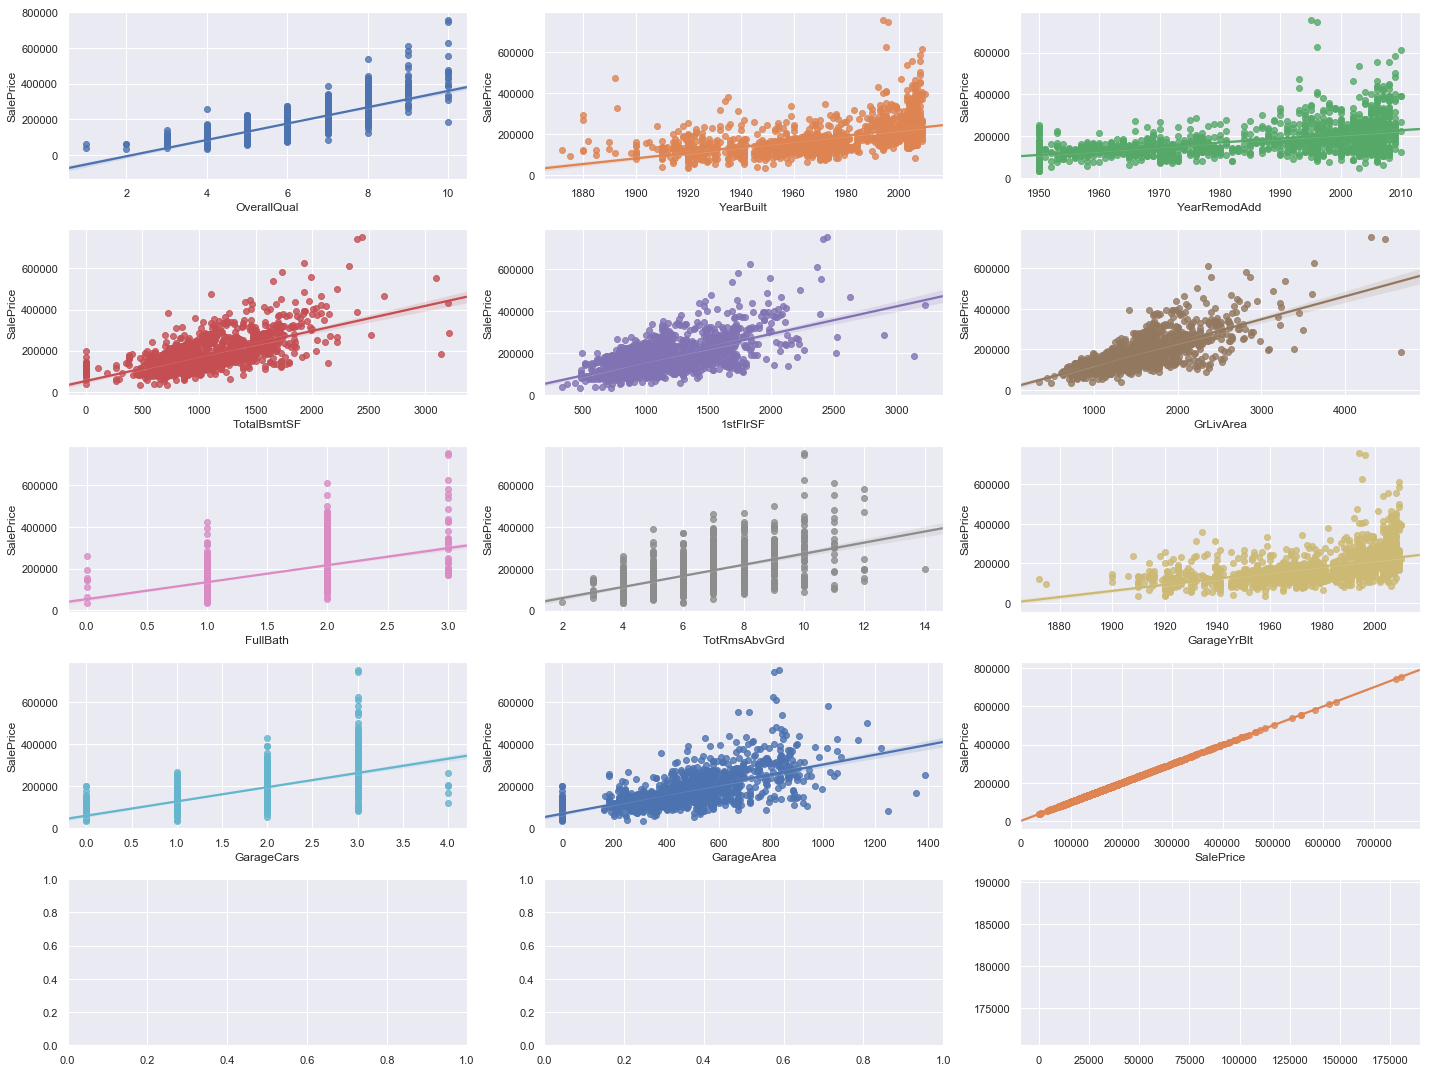

In [39]:
fig, ax = plt.subplots(len(features)//3 + 1, 3, figsize = (20,15))
for i, ax in enumerate(fig.axes):
#for i in range(len(features)):
    #print(features[i])
    if i <len(features):
        sns.regplot(x=features[i], y = 'SalePrice', data = df, ax=ax)
        plt.tight_layout()

## Plotting Categorical variables

In [40]:
#check if there are any missing values in cat columns
df[cat_cols].isnull().sum()

MSZoning            0
Street              0
Alley            1360
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [41]:
df[cat_cols].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,143000
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,307000
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,200000
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml,129900
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal,118000


#### Imputing missing values


BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38

all these dont have basements, so we can replace these as No Basement

In [42]:
df[df['BsmtQual'].isnull() | df['BsmtCond'].isnull() |  df['BsmtExposure'].isnull() | df['BsmtFinType1'].isnull()| df['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.000000,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.000000,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,1955.0,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.000000,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.000000,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.000000,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.000000,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.000000,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
332,333,20,RL,85.000000,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
342,343,90,RL,71.595745,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.000000,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,ConLD,Normal,198500


In [43]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('No Basement)')

In [44]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum()>0]

Alley           1360
MasVnrType         8
Electrical         1
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

Again, all missing garage parameters don't have a garage, we can check this

In [45]:
df[['GarageType','GarageFinish','GarageQual','GarageCond']][df['GarageType'].isnull()]

,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN


So, we can replace all the missing garage vars with No Garage

In [46]:
df[['GarageType','GarageFinish','GarageQual','GarageCond']] = df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage)')

In [47]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum()>0]

Alley         1360
MasVnrType       8
Electrical       1
dtype: int64

From data description, missing alley means no alley, let's replace that as well

In [48]:
df['Alley'] = df['Alley'].fillna("No Alley")

In [49]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum()>0]

MasVnrType    8
Electrical    1
dtype: int64

In [50]:
df[cat_cols][df['MasVnrType'].isnull()]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
234,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal,216500
529,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Stone,NaN,Gd,TA,PConc,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Maj1,Attchd,RFn,TA,TA,Y,WD,Alloca,200624
650,FV,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,205950
936,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,184900
973,FV,Pave,No Alley,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,CemntBd,CmentBd,NaN,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,New,Partial,182000
977,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,New,Partial,199900
1243,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial,465000
1278,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,237000


In [51]:
# let's replace missing MasVnrType as No Veneer

df['MasVnrType'] = df['MasVnrType'].fillna("No Veneer")

In [52]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum()>0]

Electrical    1
dtype: int64

In [53]:
df[cat_cols][df['Electrical'].isnull()]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1379,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,NaN,Gd,Typ,BuiltIn,Fin,TA,TA,Y,WD,Normal,167500


In [54]:
df['Electrical'].value_counts(normalize = True)

SBrkr    0.913793
FuseA    0.064828
FuseF    0.018621
FuseP    0.002069
Mix      0.000690
Name: Electrical, dtype: float64

In [55]:
#let's replace the missinng electrical with the most common Electrical type i.e. SBrkr

In [56]:
df['Electrical'] = df['Electrical'].fillna("SBrkr")

In [57]:
df[cat_cols].isnull().sum()[df[cat_cols].isnull().sum()>0]

Series([], dtype: int64)

### No missing remain anymore

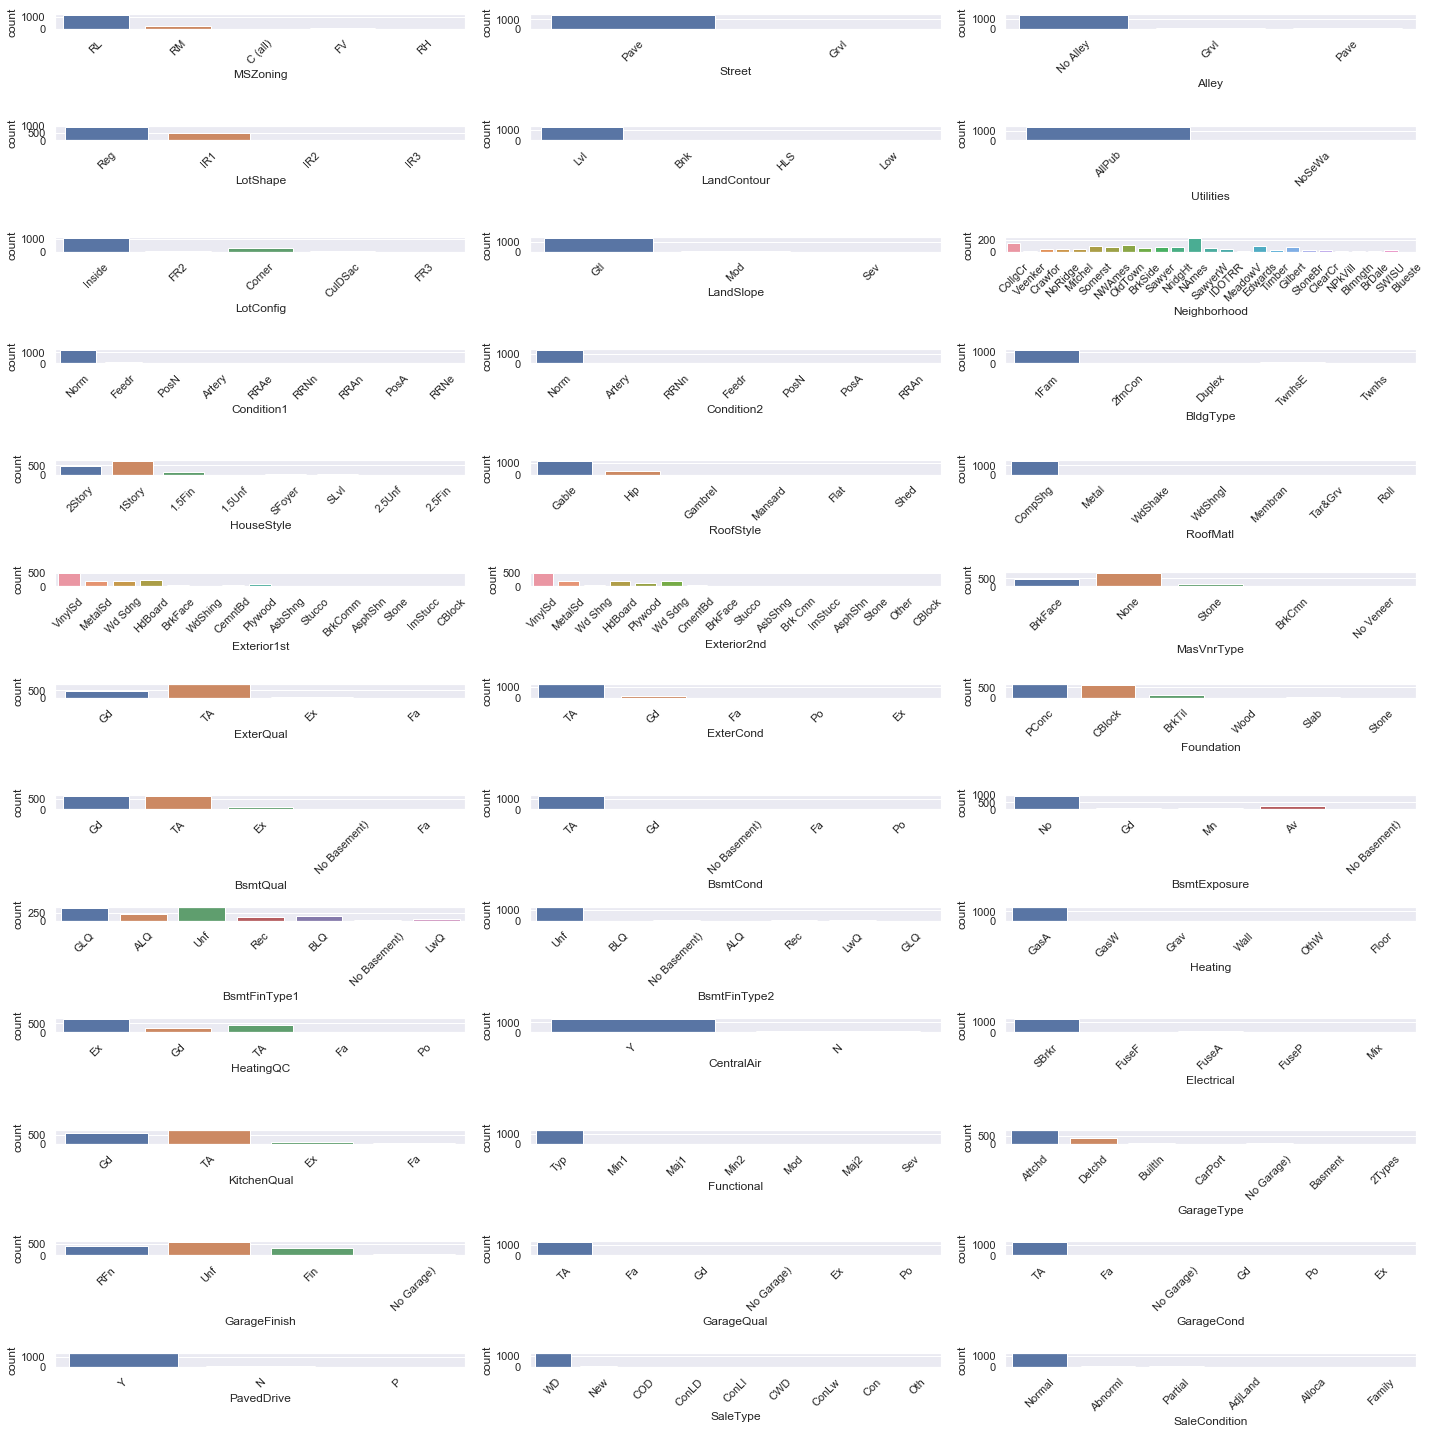

In [58]:
fig, ax = plt.subplots(len(cat_cols)//3,3, figsize = (20,20))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols)-1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x= cat_cols[i], data = df, ax=ax, )
        
fig.tight_layout()

# Part B: Model Fitting (Linear)

#### First we will convert all categorical variables into dummy variables

In [59]:
#saving df from part A into another df as a back up
d_originalal_from_partA = df

In [60]:
df = pd.get_dummies(df)

In [61]:
df.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Alley,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_No Veneer,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement),BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement),BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement),BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement),BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement),BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Fun

In [62]:
df.shape

(1451, 297)

#### Spliting df into train and test

In [63]:
from sklearn.model_selection import train_test_split as tts


In [64]:
tr_x, ts_x, tr_y, ts_y = tts(df.drop('SalePrice', axis=1), df['SalePrice'], random_state = 36, test_size = 0.25 )

tr_x.shape, ts_x.shape, tr_y.shape, ts_y.shape

((1088, 296), (363, 296), (1088,), (363,))

In [65]:
#importing linear regression library
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [66]:
#Creating instance of LR
lr = LR(normalize=True)

In [67]:
#model fitting
lr.fit(tr_x, tr_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [94]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(tr_x)
mae_train = mae(train_predict, tr_y)
print('Training Mean Absolute Error', mae_train )

Training Mean Absolute Error 12806.00919117647


In [95]:
# Now we predict over test set
test_predict = lr.predict(ts_x)
mae_test = mae(test_predict, ts_y)
print('Test Mean Absolute Error', mae_test )

Test Mean Absolute Error 7896142106129584.0


#### Huge Huge difference in MAE b/w TRAIN and TEST data set. overfitting?

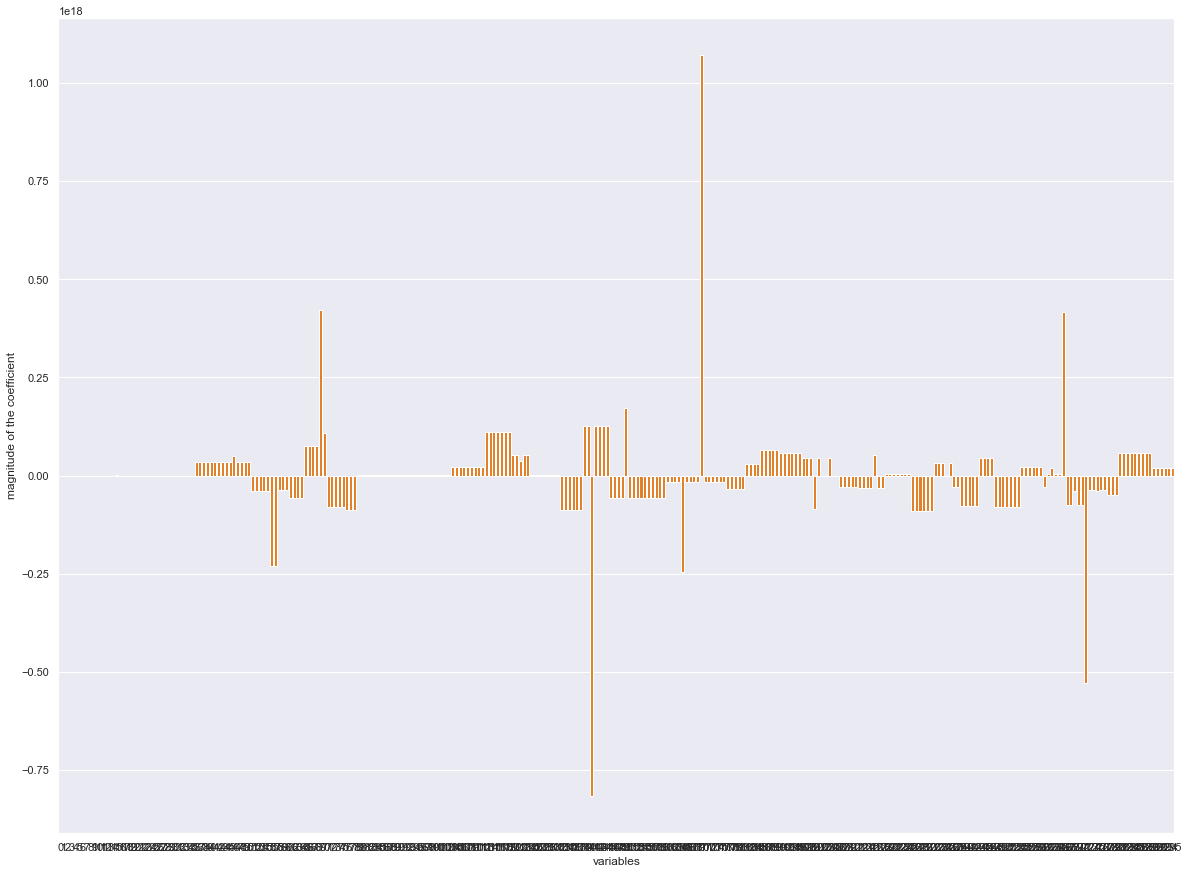

In [96]:
plt.figure(figsize=(20,15))
sns.barplot(x=np.arange(len(lr.coef_)),y=lr.coef_, color = "tab:orange"  ) 
plt.xlabel("variables")
plt.ylabel("magnitude of the coefficient")
plt.show()

As we can see, if making a base model, i.e. applying simple linear regression over all the variables, we get a highly overfit model, in which there are a FEW variables that are meaningful, as understood from the magnitude of the coefficients

#### Checking assumptins of linear model

In [107]:
residuals = pd.DataFrame({"actual_values":ts_y, "predicted_values":test_predict})
                         
residuals["residuals"] =  ts_y - test_predict

residuals.head()

,actual_values,predicted_values,residuals
922,169990,1.772360e+05,-7.246000e+03
145,130000,1.190120e+05,1.098800e+04
944,137500,-3.131130e+17,3.131130e+17
57,196500,1.909160e+05,5.584000e+03
81,153500,1.694760e+05,-1.597600e+04


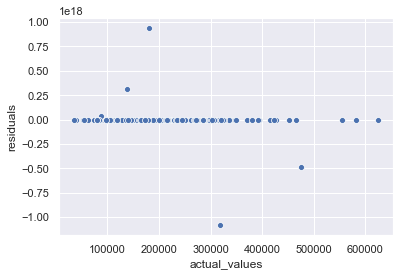

In [111]:
sns.scatterplot(x='actual_values', y='residuals', data = residuals)
#plt.ylim(-200000, 200000)

Some outlier values in the residuals are making it look as if most of the residuals are zero

(-200000, 200000)

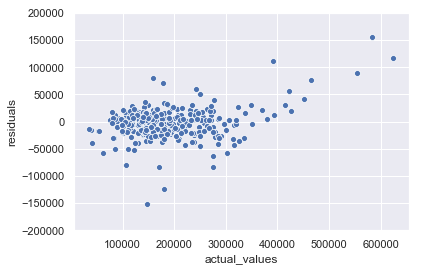

In [114]:
sns.scatterplot(x='actual_values', y='residuals', data = residuals)
plt.ylim(-200000, 200000)

#### Checking distribution of the residuals

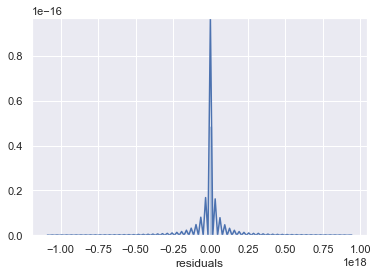

In [123]:
sns.distplot(residuals['residuals'], bins = 100)

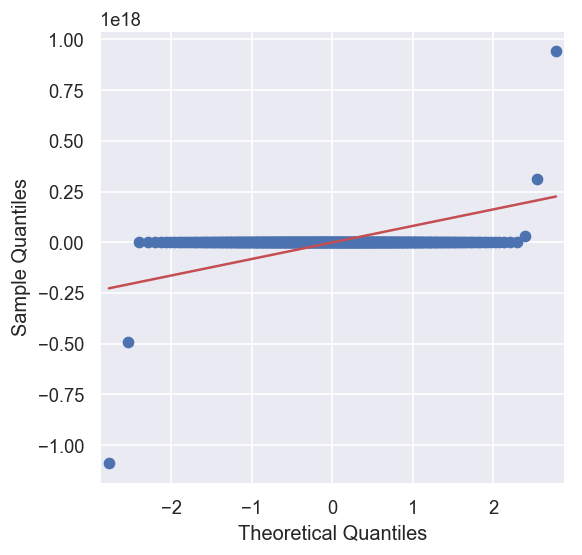

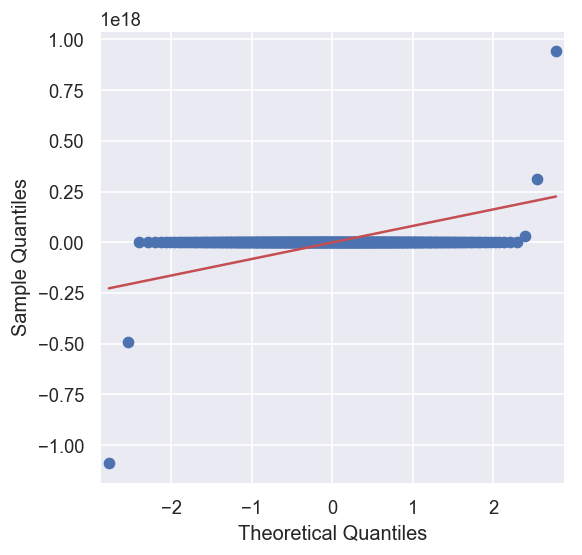

In [128]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals['residuals'], line = 's' , ax = ax)

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [132]:
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF[VIF<4]

Id               1.207821
LotFrontage      2.776038
LotArea          3.067544
OverallCond      2.837258
YearRemodAdd     3.738052
MasVnrArea       3.116498
BsmtFullBath     2.939013
BsmtHalfBath     1.466401
HalfBath         3.145473
BedroomAbvGr     3.719269
Fireplaces       2.099259
WoodDeckSF       1.514134
OpenPorchSF      1.660359
EnclosedPorch    1.627749
3SsnPorch        1.223523
ScreenPorch      1.357212
PoolArea         1.373124
MiscVal          1.403210
MoSold           1.255501
YrSold           1.338834
dtype: float64